In [136]:
import matplotlib.pyplot as plt
import numpy as np

In [137]:
def intensity(r,g, b):
    return (r+g+b)/3

def luminance(r,g,b):
    return 0.3*r + 0.59*g + 0.11*b

def luma(r,g,b):
    return 0.2126*r + 0.7152*g + 0.0722*b

def lightness(r,g,b):
    """
    Perceptually uniform grayscale representation in the CIELAB and CIELUV spaces
    """
    y = 0.2126*r + 0.7152*g + 0.0722*b
    return (1/100) * (116 * gamma_corr(y) - 16)
    
def gamma_corr(t):
    """
    a Lightness non linearity function that implements a kind of gamma corretion 
    """
    if t > (6/29)**3:
        f = t**(1/3)
        return f
    else:
        f = t*(1/3)*(29/6)**2 + 4/29
        return f

def value(r,g,b):
    return max(r,g,b)


def luster(r,g,b):
    return 0.5*(max(r,g,b) + min(r,g,b))



In [138]:
def get_fixed_rgb(grl=0.75):
    """
    returns a triplet of r, g, b values with a equivalent level
    of gray equal to gray_level
    """
    x,y,z = np.random.random(3)
    total = x + y + z
    return grl * x / total, grl * y / total, grl * z / total

In [150]:
def get_fixed_lightness(a=0.2126, b=0.7152, c=0.0722, lum=0.5, size=20):
    """
    returns a triplet of r, g, b values with a equivalent level
    of gray equal to gray_level
    lum = 0.21*r + 0.72 * g + 0.07 * b
    """
    pick = np.random.randint(0,3,size=size*5)
    colors = []
    for p in pick:
        if p == 0:
            gr, bl = np.random.random(2)
            rd = (lum - (b*gr + c*bl)) / a

        elif p == 1:
            rd, bl = np.random.random(2)
            gr = (lum - (a*rd + c*bl)) / b

        elif p == 2:
            rd, gr = np.random.random(2)
            bl = (lum - (a*rd + b*gr)) / c
            
        if 0 < rd < 1 and 0 < gr < 1 and 0 < bl < 1:
            print(p, rd, gr, bl) 
            colors.append([rd, gr, bl])
    return colors
    

In [151]:
test = np.array(get_fixed_lightness())
for i, (r,g,b) in enumerate(test):
    print(i, lightness(r,g,b))

1 0.7711435093813429 0.3938871576727045 0.7527256888920812
1 0.23846144453335394 0.6043280445609628 0.23667146014139007
1 0.32928711332934724 0.503558678680003 0.9674292619701194
1 0.6925191888013424 0.45466586875305265 0.3821799325297973
0 0.06837050856039249 0.5922303893273263 0.857358108492477
1 0.26232211442038067 0.5214862299572608 0.9870272411190333
1 0.9458238238244008 0.3917461985537503 0.25957027492091644
1 0.3664757291359697 0.5630934360889369 0.26818330325325745
1 0.8640053378441528 0.3421298059834217 0.9919837664126029
1 0.6644821572672668 0.4189573103775378 0.8184601798194465
1 0.3900829400795731 0.5412977915391731 0.41457321925576374
2 0.6647879749336263 0.4310602262384755 0.6976703978303794
0 0.2532579499966422 0.5493972445995015 0.737236156414826
1 0.23364886321106093 0.5362966615172223 0.9247490216649737
1 0.4548881281830962 0.5125213620624051 0.5088020194077792
1 0.8727946438767827 0.4176518296837307 0.21799543105251806
1 0.024224694227332533 0.6179562762608205 0.7325

In [152]:
test

array([[0.77114351, 0.39388716, 0.75272569],
       [0.23846144, 0.60432804, 0.23667146],
       [0.32928711, 0.50355868, 0.96742926],
       [0.69251919, 0.45466587, 0.38217993],
       [0.06837051, 0.59223039, 0.85735811],
       [0.26232211, 0.52148623, 0.98702724],
       [0.94582382, 0.3917462 , 0.25957027],
       [0.36647573, 0.56309344, 0.2681833 ],
       [0.86400534, 0.34212981, 0.99198377],
       [0.66448216, 0.41895731, 0.81846018],
       [0.39008294, 0.54129779, 0.41457322],
       [0.66478797, 0.43106023, 0.6976704 ],
       [0.25325795, 0.54939724, 0.73723616],
       [0.23364886, 0.53629666, 0.92474902],
       [0.45488813, 0.51252136, 0.50880202],
       [0.87279464, 0.41765183, 0.21799543],
       [0.02422469, 0.61795628, 0.73251387],
       [0.50301884, 0.49459537, 0.544648  ],
       [0.09947628, 0.65832053, 0.11108728],
       [0.40564845, 0.51071559, 0.6716808 ],
       [0.38275821, 0.54972094, 0.35270344],
       [0.02686669, 0.59477265, 0.95438698],
       [0.

In [153]:
test.shape

(49, 3)

In [154]:
test = np.hstack((test, np.ones_like(test)))
test = test[:,0:4]

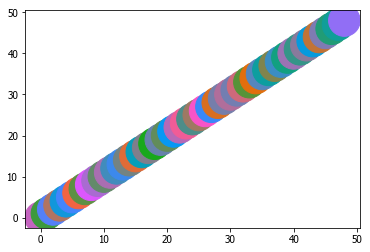

In [155]:
plt.scatter(np.arange(len(test)), np.arange(len(test)), c=test, s=1000)

In [156]:
grey = [np.array([lightness(r,g,b), lightness(r,g,b), lightness(r,g,b)]) for r,g,b,a in test]

In [157]:
grey

[array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.76069261]),
 array([0.76069261, 0.76069261, 0.

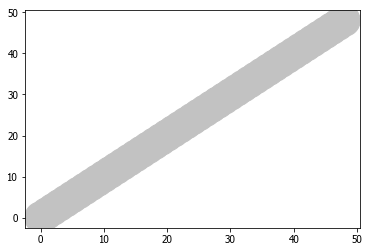

In [158]:
plt.scatter(np.arange(len(test)), np.arange(len(test)), c=grey, s=1000)

In [159]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']
from matplotlib.font_manager import FontProperties


(0.0, 1.0, 0.0, 1.0)

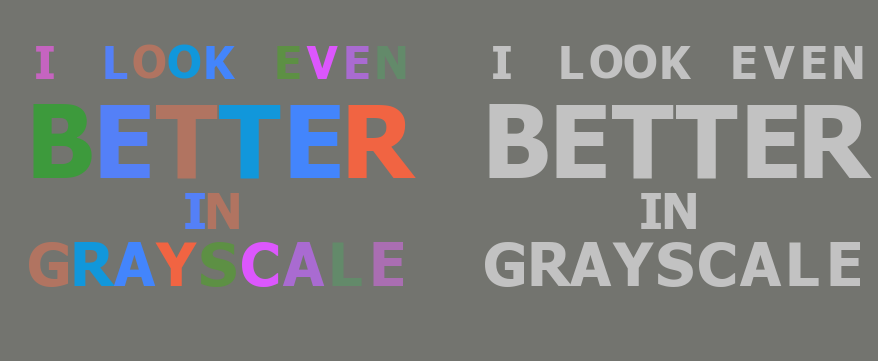

In [160]:
font = FontProperties() 
font.set_weight('heavy')
facecolor = '#73746f' #'#6a7087' #'#3a445a', #73746f


line01 = 'I look even'
line02 = 'better'
line03 = 'in'
line04 = 'grayscale'

lines = [line01, line02, line03, line04]
nchars = sum([len(chars) for chars in lines])
sizes = [45, 100, 50, 60]
ys = [0.10, 0.275, 0.55, 0.700]
widths = [1.0, 1.0, 0.15, 1.0]
center = [0, 0, 0.4, 0]
colors = test

fig, axs = plt.subplots(figsize = (15,6), ncols=2)
for j, (lin, siz, y, w, cent) in enumerate(zip(lines, sizes, ys, widths, center)):
    length = len(lin)
    
    for i, char in enumerate(lin):
        gray_val = lightness(colors[i+j][0],colors[i+j][1],colors[i+j][2])
        axs[0].text(x = w*(i+0.5)/length + cent, y= 1-y, s=char.upper(), size=font.set_size(siz), 
                    ha='center', va='top', 
                    color = np.array(colors[i+j]),
                    fontproperties=font)
        
        if True:
            axs[1].text(x = w*(i+0.5)/length +cent, y= 1-y, s=char.upper(), size=siz, 
                        ha='center', va='top', 
                        color = (gray_val,gray_val,gray_val, 1.0),
                        fontproperties=font)

fig.patch.set_facecolor(facecolor)
axs[0].axis('off')
axs[1].axis('off')

In [ ]:
axs[1].text()